In [24]:
import os
import shutil
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# The path to the directory where the original dataset was uncompressed
BASE_DIR = 'C:/Users/Arthur_Noh/Desktop/dogs-vs-cats'
IMG_DIR = 'C:/Users/Arthur_Noh/Desktop/dogs-vs-cats/train'

In [26]:
# Total number of image
len(os.listdir(IMG_DIR))

25000

In [27]:
# Print image name
os.listdir(IMG_DIR)[:10]

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.10000.jpg',
 'cat.10001.jpg',
 'cat.10002.jpg',
 'cat.10003.jpg',
 'cat.10004.jpg']

In [28]:
# Directory with 30 cat pictures
CATS30_DIR = os.path.join(BASE_DIR, 'cats30')

# Make a path directory
os.mkdir(CATS30_DIR)

In [29]:
# Copy first 30 cat images to cats30_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(30)]

for fname in fnames:
    src = os.path.join(IMG_DIR, fname)
    dst = os.path.join(CATS30_DIR, fname)
    shutil.copyfile(src, dst)

In [7]:
# Check if pictures were copied wll in cats30_dir
os.listdir(CATS30_DIR)

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.11.jpg',
 'cat.12.jpg',
 'cat.13.jpg',
 'cat.14.jpg',
 'cat.15.jpg',
 'cat.16.jpg',
 'cat.17.jpg',
 'cat.18.jpg',
 'cat.19.jpg',
 'cat.2.jpg',
 'cat.20.jpg',
 'cat.21.jpg',
 'cat.22.jpg',
 'cat.23.jpg',
 'cat.24.jpg',
 'cat.25.jpg',
 'cat.26.jpg',
 'cat.27.jpg',
 'cat.28.jpg',
 'cat.29.jpg',
 'cat.3.jpg',
 'cat.4.jpg',
 'cat.5.jpg',
 'cat.6.jpg',
 'cat.7.jpg',
 'cat.8.jpg',
 'cat.9.jpg']

In [8]:
# A picture of one cat as an example
img_name = 'cat.10.jpg'
img_path = os.path.join(CATS30_DIR, img_name)

# Preprocess the image into a 4D tensor using keras.preprocessing
from keras.preprocessing import image
img = image.load_img(img_path, target_size=(250, 250))
img_tensor = image.img_to_array(img)

In [9]:
# Expand a dimension (3D -> 4D)
img_tensor = np.expand_dims(img_tensor, axis=0)

img_tensor.shape

(1, 250, 250, 3)

In [10]:
# scaling into [0, 1]
img_tensor /= 255

img_tensor.shape

[[[[0.10196079 0.11764706 0.15294118]
   [0.07450981 0.09019608 0.1254902 ]
   [0.03137255 0.04705882 0.09019608]
   ...
   [0.5058824  0.6313726  0.61960787]
   [0.49411765 0.61960787 0.60784316]
   [0.49019608 0.6156863  0.6039216 ]]

  [[0.11764706 0.13333334 0.16862746]
   [0.13725491 0.15294118 0.1882353 ]
   [0.08627451 0.10196079 0.14509805]
   ...
   [0.50980395 0.63529414 0.62352943]
   [0.49803922 0.62352943 0.6117647 ]
   [0.4862745  0.6117647  0.6       ]]

  [[0.11372549 0.14117648 0.16470589]
   [0.16470589 0.19215687 0.21568628]
   [0.15294118 0.18039216 0.21176471]
   ...
   [0.50980395 0.63529414 0.62352943]
   [0.5019608  0.627451   0.6156863 ]
   [0.49019608 0.6156863  0.6039216 ]]

  ...

  [[0.69411767 0.6431373  0.46666667]
   [0.6862745  0.63529414 0.45882353]
   [0.6627451  0.6117647  0.4392157 ]
   ...
   [0.7254902  0.70980394 0.04313726]
   [0.6745098  0.6509804  0.03921569]
   [0.64705884 0.6156863  0.05490196]]

  [[0.64705884 0.5921569  0.44705883]
   [0.6

In [13]:
img_tensor[0]

array([[[0.10196079, 0.11764706, 0.15294118],
        [0.07450981, 0.09019608, 0.1254902 ],
        [0.03137255, 0.04705882, 0.09019608],
        ...,
        [0.5058824 , 0.6313726 , 0.61960787],
        [0.49411765, 0.61960787, 0.60784316],
        [0.49019608, 0.6156863 , 0.6039216 ]],

       [[0.11764706, 0.13333334, 0.16862746],
        [0.13725491, 0.15294118, 0.1882353 ],
        [0.08627451, 0.10196079, 0.14509805],
        ...,
        [0.50980395, 0.63529414, 0.62352943],
        [0.49803922, 0.62352943, 0.6117647 ],
        [0.4862745 , 0.6117647 , 0.6       ]],

       [[0.11372549, 0.14117648, 0.16470589],
        [0.16470589, 0.19215687, 0.21568628],
        [0.15294118, 0.18039216, 0.21176471],
        ...,
        [0.50980395, 0.63529414, 0.62352943],
        [0.5019608 , 0.627451  , 0.6156863 ],
        [0.49019608, 0.6156863 , 0.6039216 ]],

       ...,

       [[0.69411767, 0.6431373 , 0.46666667],
        [0.6862745 , 0.63529414, 0.45882353],
        [0.6627451 , 0

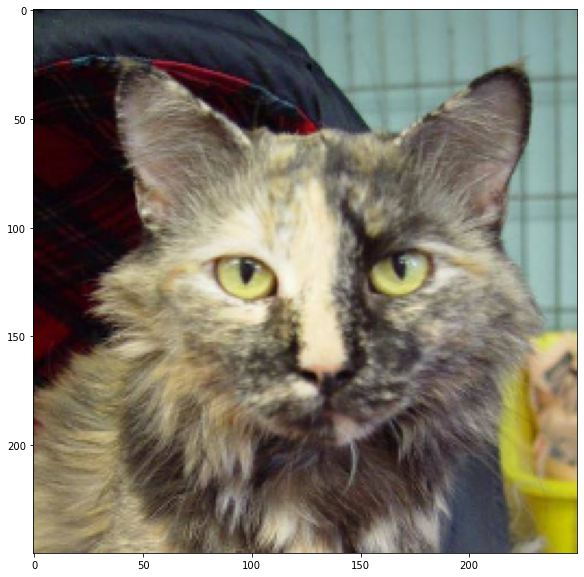

In [17]:
# Show image

# Set figure size
plt.rcParams['figure.figsize'] = (10,10)

plt.imshow(img_tensor[0])
plt.show()

In [18]:
# UDF of pre-processing image into a 4D tensor
def preprocess_img(img_path, target_size=100):
    from keras.preprocessing import image
    
    img = image.load_img(img_path, target_size=(target_size, target_size))
    img_tensor = image.img_to_array(img)
    
    # expand a dimension
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    # scaling into [0, 1]
    img_tensor /= 255
    
    return img_tensor

In [19]:
# layout
n_pic = 30
n_col = 5
n_row = int(np.ceil(n_pic/n_col))

# plot & margin size
target_size = 100
margin = 3

# blank matrix to store results
total = np.zeros((n_row * target_size + (n_row-1) * margin,
                  n_col * target_size + (n_col-1) * margin, 3))

#append the image tnesors to the 'total matrix'
img_seq = 0

In [22]:
for i in range(n_row):
    for j in range(n_col):
        
        fname = 'cat.{}.jpg'.format(img_seq)
        img_path = os.path.join(CATS30_DIR, fname)
        
        img_tensor = preprocess_img(img_path, target_size)
        
        horizontal_start = i * target_size + i * margin
        horizontal_end = horizontal_start + target_size
        vertical_start = j * target_size + j * margin
        vertical_end = vertical_start + target_size
        
        total[horizontal_start:horizontal_end, vertical_start:vertical_end, :] = img_tensor[0]
        
        img_seq+=1

In [23]:
# Display the pictures in grid
plt.figure(figsize=(200,200))
plt.imshow(total)
plt.show()